SVM
- SVC 분류 / SVR 회귀

tree
- DecisionTreeClassifier 분류
- DecisionTreeRegressor 회귀

## Clustering

### A.분류의 2가지 종류
- Classification
- Clustering

### B.군집분석(Clustering)의 원리
- ① 거리가 가까운 (유사도가 높은) 개체들을 서로 묶어 하나의 그룹으로 정리
- ② 거리(유사도)의 계산방법: 유클리드 거리(Euclidean distance)가 주로 사용됨 (vs맨해튼거리)
- ③ 군집화방법
    - 계층적 군집화 방법 Hierarchical method
    - 비계층적 군집화 방법 K-means clustering(비지도학습, Unsupervised Learning), 자기 조직화 지도(SOM, Self Organizing Maps) 등

### C. K-means 군집화의 실행단계
- ① 나누고자 하는 클러스터의 개수를 설정, 그 갯수만큼 임의의 초기점 생성
- ② (임의로) initial point를 군집중심점으로 생각하고 군집 구분 실시 
- ③ 군집별로 새로운 군집중심점을 계산
- ④ 새로운 군집중심점을 기준으로 군집 구분 실시
- ⑤ ③-④번 과정을 반복 (더 이상 군집 구분의 변화가 없을 때까지)

### D. K-means clustering 방법의 장/단점
- 장점
    - 적용이 쉽고 간단하다
- 단점
    - 군집의 개수 K는 사전에 설정하여야 한다
    - 군집 설정에 Outlier(극단좌표)의 영향이 크게 작용한다

### 예제) 1.개요

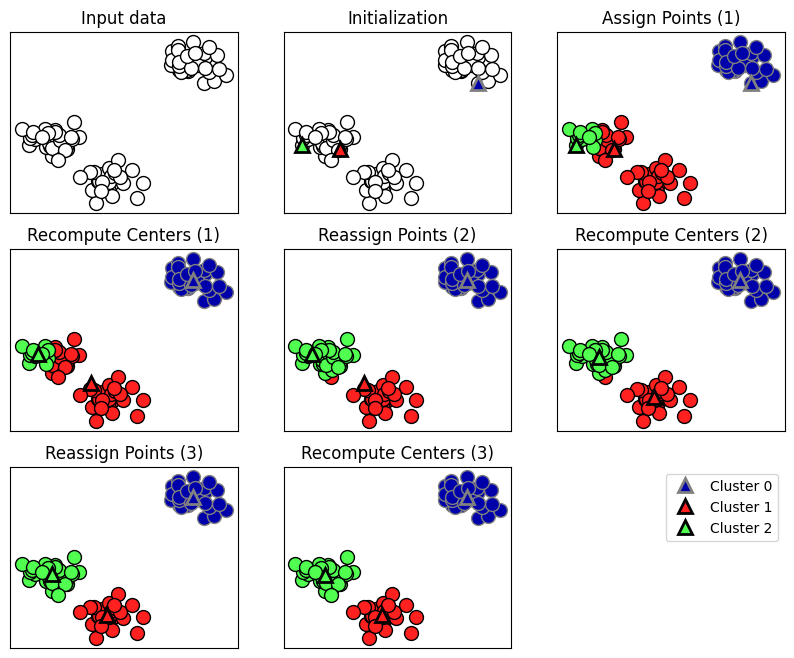

In [1]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

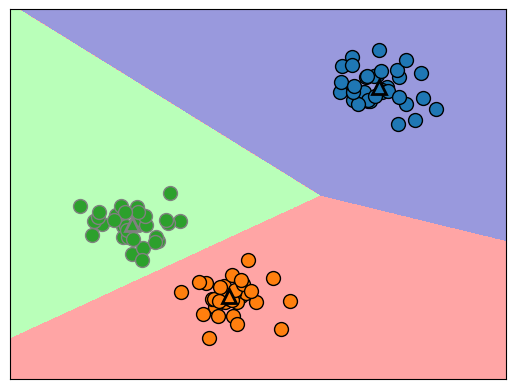

In [2]:
# kmeans 경계표시
import matplotlib.pyplot as plt
mglearn.plots.plot_kmeans_boundaries()
plt.show()

In [3]:
from sklearn.cluster import KMeans
import numpy as np
x = np.array([[1,2], [1,4], [1,0], 
              [10,2], [10,4], [10,0]])

# 2개 클러스터로 구분
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
        # cluster수는 정해줘야 함
# 모형이 분류한 라벨
print(kmeans.labels_)

[1 1 1 0 0 0]


c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
# 새로운 값 분류
x_new = np.array([[0,0], [12,3]])
print(kmeans.predict(x_new))

[1 0]


In [5]:
# 중심좌표
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

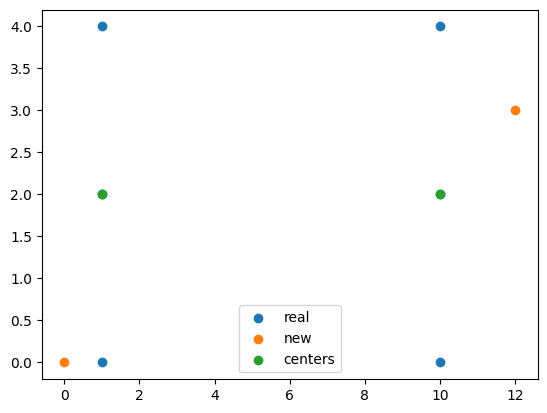

In [6]:
plt.scatter(x[:,0], x[:,1], label='real')
plt.scatter(x_new[:,0], x_new[:,1], label='new')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], label = 'centers')
plt.legend()
plt.show()

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적인 2차원 데이터셋
x, y = make_blobs(random_state=1)

# clustering model 
model = KMeans(n_clusters=3)
model.fit(x)

# 모형이 분류한 값
lbl = model.labels_
lbl

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [8]:
# 예측한 값
pred = model.predict(x)
pred

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [9]:
# 모델 정확도
import sklearn.metrics as sm
sm.accuracy_score(y, pred)   # 클러스터링에서 accuracy 정확도는 사실상 의미가 없음

# 실루엣스코어가 의미가 있음. 얼마나 잘 나누어졌는지 확인

1.0

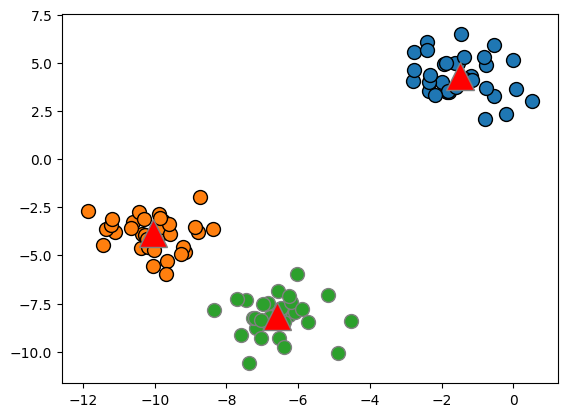

In [10]:
# 산점도

mglearn.discrete_scatter(x[:,0], x[:,1], lbl, markers='o')

# centers
mglearn.discrete_scatter(
    model.cluster_centers_[:,0], model.cluster_centers_[:,1], [0,1,2],
    markers = '^', c='r', s=20
)
plt.show()

c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to 

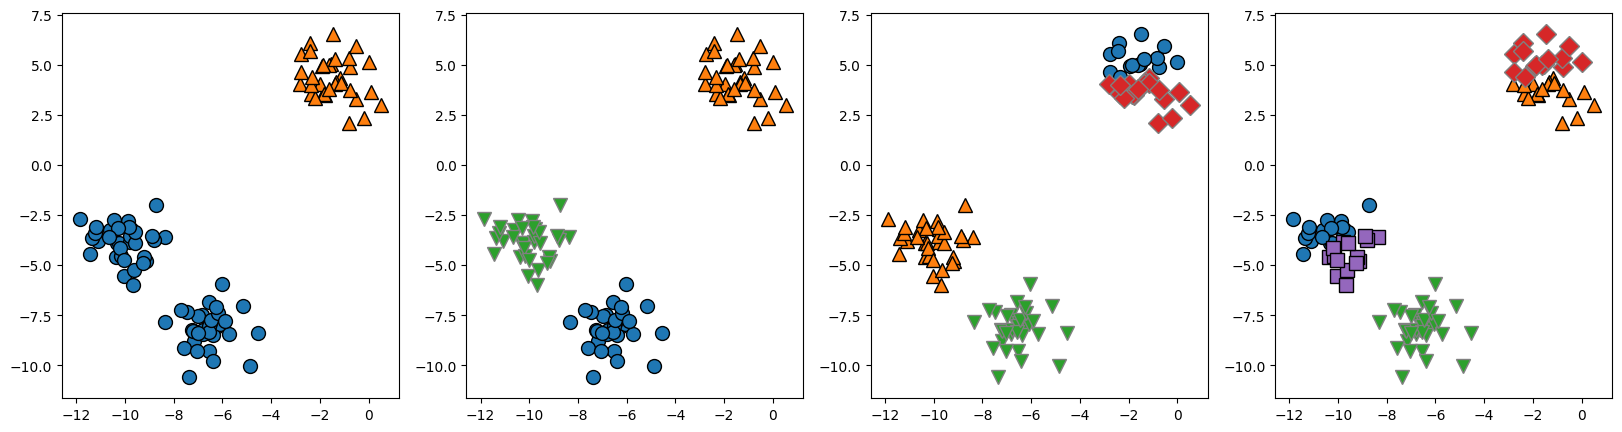

In [11]:
# 같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
# 1행 4열의 서브플롯 생성
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
# 2,3,4,5개의 클러스터로 나눌 경우
idx=0
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    lbls = kmeans.labels_
    mglearn.discrete_scatter(x[:, 0], x[:, 1], lbls, ax=axes[idx])
    idx+=1
plt.show()